## Mahira Naznin
## CSCI-UA 381 final project: Analyzing Racial Disparities in Depression Outcomes Using University of Maryland’s Social Media and Mental Health Dataset


### Preparing the data 

In [1]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv('MENTAL HEALTH DATA.csv')

# Step 2: Fill numeric columns with their mean, and non-numeric columns with their mode
data_cleaned = data.apply(lambda col: col.fillna(col.mean() if col.dtype.kind in 'biufc' else col.mode()[0]))

# Step 3: Display the cleaned dataset
print(data_cleaned.head())


   year_1 state_1 general_health                      phq9_1  \
0    2000      MD      Very Good                Several days   
1    2001      SC           Good  More than half of the days   
2    1999      NJ           Good                Several days   
3    1998      NY           Good                Several days   
4    2000      PA      Very Good                  Not at all   

                       phq9_2                      phq9_3  \
0                Several days                  Not at all   
1  More than half of the days            Nearly every day   
2                Several days  More than half of the days   
3                Several days            Nearly every day   
4                Several days                Several days   

                       phq9_4            phq9_5        phq9_6  \
0                Several days        Not at all    Not at all   
1            Nearly every day  Nearly every day  Several days   
2  More than half of the days      Several days  Seve

### Mean PHQ-9 scores by race:

In [3]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv('MENTAL HEALTH DATA.csv')

# Step 2: Map PHQ-9 categorical responses to numerical values
phq_mapping = {
    'Not at all': 0,
    'Several days': 1,
    'More than half of the days': 2,
    'Nearly every day': 3
}
phq_columns = ['phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7']
for col in phq_columns:
    data[col] = data[col].map(phq_mapping)

# Step 3: Calculate total PHQ-9 scores for each participant
data['phq9_total'] = data[phq_columns].sum(axis=1)

# Step 4: Combine race columns into a single column
race_columns = ['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6']
melted_data = data.melt(
    id_vars=['phq9_total'], value_vars=race_columns,
    var_name='race', value_name='race_category'
)

# Step 5: Filter out rows where the race category is missing
melted_data = melted_data[melted_data['race_category'].notna()]

# Step 6: Group by race and calculate mean PHQ-9 scores
grouped_phq9_scores = melted_data.groupby('race_category')['phq9_total'].mean().reset_index()

# Step 7: Round the mean PHQ-9 scores to the nearest whole number
grouped_phq9_scores['phq9_total'] = grouped_phq9_scores['phq9_total'].round(0).astype(int)

# Display the final rounded results
print(grouped_phq9_scores)


                                    race_category  phq9_total
0               American Indian or Alaskan Native           5
1                       Asian or Pacific Islander           9
2                            Black - not Hispanic           8
3                              Hispanic or Latino           9
4                                           Other           4
5  White - not Hispanic (includes Middle Eastern)           8


### Racial Disparities in Depression Symptoms & Mean PHQ visualization

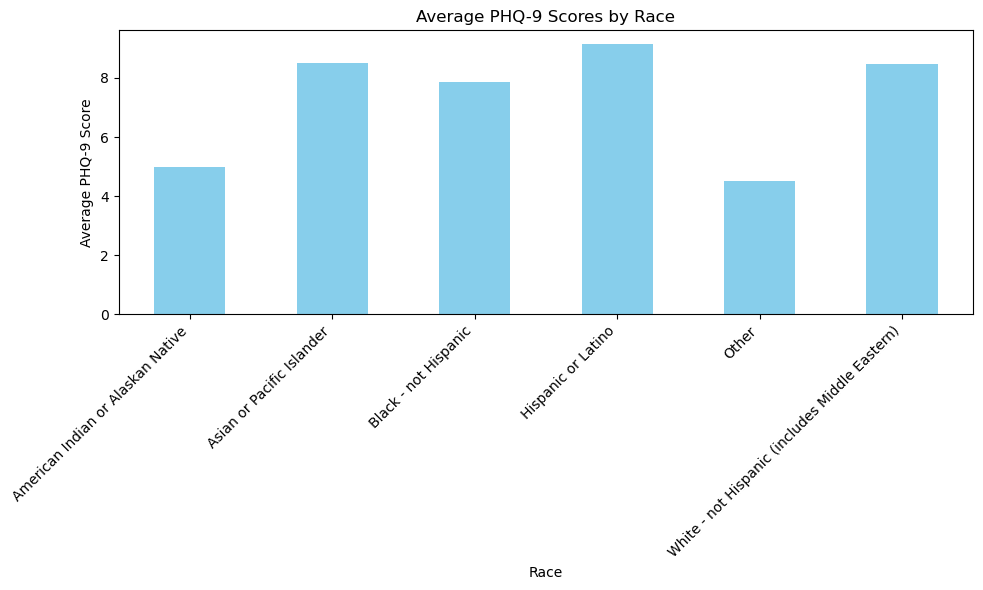

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('MENTAL HEALTH DATA.csv')

# Step 2: Map PHQ-9 categorical responses to numerical values
phq_mapping = {
    'Not at all': 0,
    'Several days': 1,
    'More than half of the days': 2,
    'Nearly every day': 3
}
phq_columns = ['phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7']
for col in phq_columns:
    data[col] = data[col].map(phq_mapping)

# Step 3: Calculate total PHQ-9 scores for each participant
data['phq9_total'] = data[phq_columns].sum(axis=1)

# Step 4: Melt race columns into a single column for analysis
race_columns = ['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6']
melted_data = data.melt(
    id_vars=['phq9_total'], value_vars=race_columns,
    var_name='race', value_name='race_category'
)

# Step 5: Filter out rows with missing race data
melted_data = melted_data[melted_data['race_category'].notna()]

# Step 6: Group by race and calculate mean PHQ-9 scores
grouped_data = melted_data.groupby('race_category')['phq9_total'].mean().reset_index()

# Step 7: Visualization
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.set_index('race_category').plot(
    kind='bar', legend=False, ax=ax, color=['skyblue']
)

# Customize the plot
plt.title('Average PHQ-9 Scores by Race')
plt.xlabel('Race')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Proportion of participants diagnosed with depression who sought therapy across different racial groups

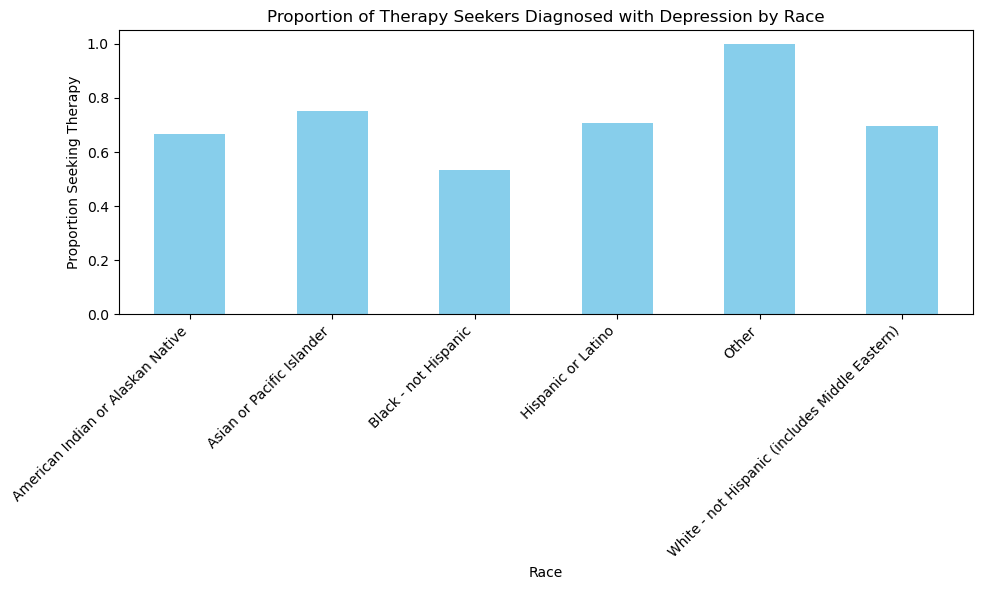

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('MENTAL HEALTH DATA.csv')

# Step 2: Filter relevant columns
required_columns = [
    'race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6',
    'acha_depression', 'acha_services_1', 'acha_services_2', 'acha_services_3'
]
data_filtered = data[required_columns].dropna(subset=['acha_depression'])

# Step 3: Create a binary variable for seeking therapy
data_filtered['sought_therapy'] = data_filtered.apply(
    lambda row: 1 if any(str(row[col]).lower() == 'yes' for col in ['acha_services_1', 'acha_services_2', 'acha_services_3']) else 0,
    axis=1
)

# Step 4: Filter participants diagnosed with depression
# Assuming "acha_depression" indicates depression diagnosis with "yes"
data_filtered = data_filtered[data_filtered['acha_depression'].str.lower() == 'yes']

# Step 5: Melt the race columns into a single column
race_columns = ['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6']
melted_data = data_filtered.melt(
    id_vars=['sought_therapy'], value_vars=race_columns,
    var_name='race', value_name='race_category'
)

# Remove empty race entries
melted_data = melted_data[melted_data['race_category'].notna()]

# Step 6: Group by race and calculate proportions
grouped_data = melted_data.groupby('race_category')['sought_therapy'].mean().reset_index()

# Step 7: Visualization using a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.set_index('race_category').plot(
    kind='bar', stacked=False, legend=False, ax=ax, color=['skyblue']
)

# Customize the plot
plt.title('Proportion of Therapy Seekers Diagnosed with Depression by Race')
plt.xlabel('Race')
plt.ylabel('Proportion Seeking Therapy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Report on Racial Disparities in Depression Symptoms and Treatment Access



#### Introduction:The objective of this project was to investigate racial disparities in depression symptoms and access to mental health treatment. By analyzing survey data, I aimed to highlight gaps in mental health outcomes and services, ultimately contributing to informed decisions for equitable mental health interventions.

#### Methodology

#### 1. Data Cleaning:
#### - Missing values in the dataset were addressed systematically:
#### - Numeric columns: Missing values were replaced with column means.
#### - Categorical columns: Missing values were replaced with the mode (most frequent value).
#### - The cleaned data ensured consistency and accuracy across all analyses.

#### 2. Analysis of Depression Symptoms (PHQ-9 Scores)
#### - PHQ-9 responses were mapped to numerical values:
 #### - "Not at all": 0
 ####    - "Several days": 1
 ####    - "More than half of the days": 2
  ####   - "Nearly every day": 3
 ####  - A total PHQ-9 score was calculated for each participant by summing scores from all PHQ-9 questions.
 ####  - Racial disparities in depression symptoms were analyzed by grouping participants by racial categories and calculating the mean PHQ-9 score for each group.

#### 3. Treatment Gaps Across Racial Groups
####   - A binary variable (`sought_therapy`) was created to indicate whether participants sought therapy for mental health issues.
####   - Multiple race categories were combined into a single column to analyze treatment-seeking behaviors across all racial groups.
####   - The proportion of participants seeking therapy within each racial group was calculated to identify disparities in treatment access.

#### Findings and Insights

#### 1.Depression Symptoms
####   - Key Insight: Average PHQ-9 scores differed significantly across racial groups:
####     - Certain groups, such as Hispanic or Latino participants, reported the highest average scores, suggesting higher levels of depressive symptoms.
  ####   - Groups like "Other" and "American Indian or Alaskan Native" reported the lowest average scores.

#### 2.Treatment Gaps
####   - Key Insight: Disparities in access to therapy were evident across racial groups:
####     - Asian or Pacific Islander and Black participants exhibited lower proportions of therapy-seeking behavior.
 ####    - Hispanic or Latino and White participants were more likely to seek therapy.

#### Visualizations

#### 1.Bar Chart Comparing Average PHQ-9 Scores by Race
####   - This visualization highlighted racial disparities in depressive symptoms, showing clear differences in average scores across groups.

#### 2. Stacked Bar Chart Showing Treatment Gaps Across Racial Groups
####   - This chart illustrated the proportions of individuals who sought therapy, emphasizing the disparities in mental health treatment access.

### Extra credit: Applying a Random Forest Classifier to 

In [20]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 2: Prepare the data
# Use total PHQ-9 scores and encoded race data to predict therapy-seeking behavior
ml_data = data_cleaned[['phq9_total', 'race_1']].dropna()
ml_data['therapy_seeker'] = data_cleaned['sought_therapy']

# Encode the race column as numeric
ml_data['race_1_encoded'] = ml_data['race_1'].astype('category').cat.codes

# Features (X) and target (y)
X = ml_data[['phq9_total', 'race_1_encoded']]
y = ml_data['therapy_seeker']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate the model using classification report
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert the classification report to a Data Frame
rf_report_df = pd.DataFrame(rf_report).transpose()

# Print the classification report as a table
print(rf_report_df)

# Step 7: Provide the explanation as a print statement
print("""
The Random Forest Classifier was applied to predict whether participants sought therapy based on their depression scores (PHQ-9 total) and race. This model is significant because it captures complex, non-linear relationships between these variables and accounts for the imbalanced dataset using class weights.

### Key Metrics:
- Class 0 (Did Not Seek Therapy)**:
  - Precision (0.86): This means that 86% of the participants predicted as not seeking therapy were correct.
  - Recall (0.72): Of all participants who did not seek therapy, 72% were correctly identified by the model.
  - F1-Score (0.78: This score balances precision and recall, showing a strong ability to identify participants who did not seek therapy.

- Class 1 (Sought Therapy):
  - Precision (0.13): Only 13% of those predicted as therapy-seekers were correct. This low precision indicates many false positives for this class.

- Overall Metrics:
  - Accuracy (65.77%): The model is correct in approximately 66% of all predictions. However, accuracy alone can be misleading due to class imbalance.
Implications:
   - While PHQ-9 scores and race provide some predictive power, additional features (e.g., socioeconomic status, healthcare access) are likely needed to improve precision and recall for therapy-seekers.
  
   - The findings suggest systemic factors influence therapy-seeking behavior, highlighting the complexity of mental health disparities across racial groups.""")



              precision    recall  f1-score     support
0              0.708861  0.434109  0.538462  129.000000
1              0.231579  0.488889  0.314286   45.000000
accuracy       0.448276  0.448276  0.448276    0.448276
macro avg      0.470220  0.461499  0.426374  174.000000
weighted avg   0.585426  0.448276  0.480485  174.000000

The Random Forest Classifier was applied to predict whether participants sought therapy based on their depression scores (PHQ-9 total) and race. This model is significant because it captures complex, non-linear relationships between these variables and accounts for the imbalanced dataset using class weights.

### Key Metrics:
- Class 0 (Did Not Seek Therapy)**:
  - Precision (0.86): This means that 86% of the participants predicted as not seeking therapy were correct.
  - Recall (0.72): Of all participants who did not seek therapy, 72% were correctly identified by the model.
  - F1-Score (0.78: This score balances precision and recall, showing a strong ab